Objective : Create an algorithm that predicts the profit for the given item_id and week

# Pre-processing

#### Reading the Input and Understanding the data

In [1]:
# importing necessary libraries
import sklearn as sk
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
file1 = 'data.csv'

In [3]:
# reading the input
# Storing it in a dataframe, We will carry out our operations on sales1.
sales1 = pd.read_csv(file1)

In [4]:
# glimpse of the dataset
sales1.head()

,item_id,week,profit
0,125,21,0.000000
1,4,34,3948.499527
2,54,38,1023.856978
3,82,15,1959.610468
4,66,13,5491.972106


In [5]:
sales1.shape

(9600, 3)

In [6]:
#Checking for missing values:
sales1.apply(lambda x: sum(x.isnull()))

item_id    0
week       0
profit     0
dtype: int64

In [7]:
print(sales1['profit'].value_counts())

0.000000        1833
3029.213920        1
8997.003635        1
432.412226         1
4401.481729        1
3751.051144        1
12609.269400       1
254.803970         1
7492.022297        1
3776.025065        1
15202.010147       1
6971.116786        1
9608.087317        1
1132.010217        1
4262.070609        1
185.886603         1
6422.861568        1
7871.861412        1
5728.368975        1
13057.209034       1
8495.856496        1
2068.542018        1
1308.994345        1
499.734047         1
9554.577249        1
7514.469110        1
17322.706159       1
567.798854         1
4935.448918        1
5481.701034        1
                ... 
5331.873675        1
10729.075824       1
15267.705357       1
2974.730274        1
16856.236528       1
7887.879025        1
6715.686432        1
7523.852912        1
7632.882502        1
3997.789024        1
5157.890837        1
11.122196          1
2015.300409        1
4881.532457        1
17806.668803       1
1043.477042        1
4036.938878  

In [8]:
# Descriptive stats
# Distribution of the data
sales1.describe()

,item_id,week,profit
count,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878
std,57.801488,15.019602,5586.007129
min,1.000000,1.000000,0.000000
25%,50.000000,14.000000,806.516798
50%,101.000000,27.000000,4046.271519
75%,151.000000,40.000000,8682.553457
max,200.000000,52.000000,31440.363492


There are no anomalies in the data(observe the maximums and means in each case)

There are 200 items & 52 weeks 

In [9]:
# reading the category to license mapping file
# Storing it in a dataframe, We will carry out our operations on sales2.
file2 = 'category_licensing_fees.csv'
sales2 = pd.read_csv(file2)
sales2.shape

(3, 2)

In [10]:
sales2

,category,licensing_fees
0,A,2000
1,B,5000
2,C,6000


In [11]:
#Reading the file containing Item to category mapping
file3 = 'item_id_category_mapping.csv'
sales3 = pd.read_csv(file3)
sales3.shape

(200, 2)

In [12]:
#glimse of the Item to category mapping file
sales3.head()

,item_id,category
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


In [13]:
sales3.tail()

,item_id,category
195,196,C
196,197,C
197,198,C
198,199,C
199,200,C


Merging the weekly profit data with Item to category mapping (Here, we are creating a column category in the sales1 dataframe 
which maps the Item_id with the respective category it belongs to)

In [14]:
df1 = pd.merge(sales1, sales3)
df1.head()

,item_id,week,profit,category
0,125,21,0.0,C
1,125,47,0.0,C
2,125,24,0.0,C
3,125,30,0.0,C
4,125,12,0.0,C


Merging the above dataframe with category to licensing_fees mapping dataframe(Here, we are creating a column licensing_fees in the sales1 dataframe which maps the licensing_fees with the respective category, Item_id it belongs to)

In [15]:
df2 = pd.merge(df1, sales2)
df2.head()

,item_id,week,profit,category,licensing_fees
0,125,21,0.0,C,6000
1,125,47,0.0,C,6000
2,125,24,0.0,C,6000
3,125,30,0.0,C,6000
4,125,12,0.0,C,6000


Since (profit = sales cost - licensing fees), we create a new column in the above dataframe which contains sales_cost of every item.

#### Assumption : 
- Here, I am assuming that the sales cost of every item as the sum of its profit + licensing fees. But this maynot be a perfect assumption.
- For example, if an item belonging to category B has profit = 0, its licensing fees will be 5000. Therefore, its sales cost becomes (0 + 5000) = 5000.
- But in acctual scenario, the sales cost can be anything between 0 and its licensing fees( 0 to 5000)

For now let's continue with the above assumption. Later we will also try to rectify the loop hole in above assumption with a different approach 

# Approcah 1

In [16]:
df2['sales_cost'] = pd.Series(df2.profit + df2.licensing_fees, index=df2.index)
df2.tail()

,item_id,week,profit,category,licensing_fees,sales_cost
9595,84,2,3314.714963,B,5000,8314.714963
9596,84,3,0.000000,B,5000,5000.000000
9597,84,44,9477.210678,B,5000,14477.210678
9598,84,5,0.000000,B,5000,5000.000000
9599,84,42,9650.270331,B,5000,14650.270331


In [17]:
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost
0,125,21,0.0,C,6000,6000.0
1,125,47,0.0,C,6000,6000.0
2,125,24,0.0,C,6000,6000.0
3,125,30,0.0,C,6000,6000.0
4,125,12,0.0,C,6000,6000.0


### Visualizing the data

#### 1. With item-id as attribute

Item_id is a continuous variable

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_i = df2['item_id']
y_i = df2['sales_cost']

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales_cost')

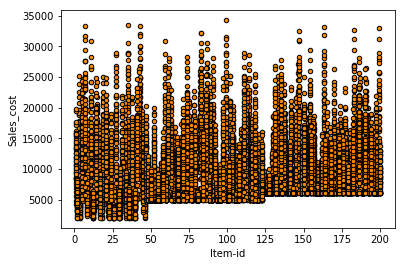

In [21]:
plt.figure()
plt.scatter(X_i,y_i,s=20,edgecolor = 'black', c = "darkorange", label = "y_train_i")
plt.xlabel('Item-id') 
plt.ylabel('Sales_cost')

From the above plot, we can observe that with increse in the Item_id, sales cost also increases roughly. So, we can say that there is some relation between Item_id and sales cost.

#### 2. With week as an attribute

Week is also a continuous variable

In [22]:
Xw = df2['week']
yw = df2['sales_cost']

Text(0, 0.5, 'Sales_cost')

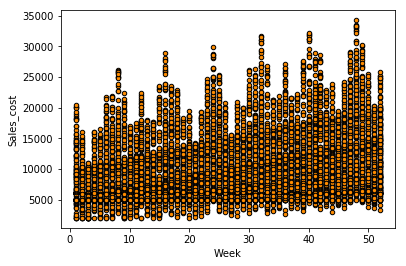

In [23]:
plt.figure()
plt.scatter(Xw,yw,s=20,edgecolor = 'black', c = "darkorange", label = "y_train_w")
plt.xlabel('Week') 
plt.ylabel('Sales_cost')

From the above plot, we can observe that with increse in the week, sales cost also increases roughly. So, we can say that there is some relation between week and sales cost.

# Feature Engineering
### 3. categories as features

Since there is a relation between categories & license_fees, categories & item_id --which inturn will effect the sales.
We need to visualize the categorical data too

In [24]:
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost
0,125,21,0.0,C,6000,6000.0
1,125,47,0.0,C,6000,6000.0
2,125,24,0.0,C,6000,6000.0
3,125,30,0.0,C,6000,6000.0
4,125,12,0.0,C,6000,6000.0


In [25]:
df2.category.value_counts()

C    3701
B    3686
A    2213
Name: category, dtype: int64

Since category is a "categorical variable". We have to one hot encode it.
Here we are doing the same with the function get_dummies

#### One Hot encoding

In [26]:
#dummy encoding
embarked_dataset = pd.get_dummies(df2.category, prefix='Category')
embarked_dataset.head()

,Category_A,Category_B,Category_C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


Here, we are concatenating the above embarked_dataset with the df2

In [27]:
df2 = pd.concat([df2, embarked_dataset], axis=1, levels=1)
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C
0,125,21,0.0,C,6000,6000.0,0,0,1
1,125,47,0.0,C,6000,6000.0,0,0,1
2,125,24,0.0,C,6000,6000.0,0,0,1
3,125,30,0.0,C,6000,6000.0,0,0,1
4,125,12,0.0,C,6000,6000.0,0,0,1


In [28]:
df2.tail()

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C
9595,84,2,3314.714963,B,5000,8314.714963,0,1,0
9596,84,3,0.000000,B,5000,5000.000000,0,1,0
9597,84,44,9477.210678,B,5000,14477.210678,0,1,0
9598,84,5,0.000000,B,5000,5000.000000,0,1,0
9599,84,42,9650.270331,B,5000,14650.270331,0,1,0


In [29]:
df2.describe()

,item_id,week,profit,licensing_fees,sales_cost,Category_A,Category_B,Category_C
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878,4693.958333,10274.122211,0.230521,0.383958,0.385521
std,57.801488,15.019602,5586.007129,1538.438615,5422.155276,0.421188,0.486373,0.486743
min,1.000000,1.000000,0.000000,2000.000000,2000.000000,0.000000,0.000000,0.000000
25%,50.000000,14.000000,806.516798,5000.000000,6000.000000,0.000000,0.000000,0.000000
50%,101.000000,27.000000,4046.271519,5000.000000,8739.314533,0.000000,0.000000,0.000000
75%,151.000000,40.000000,8682.553457,6000.000000,13392.373287,0.000000,1.000000,1.000000
max,200.000000,52.000000,31440.363492,6000.000000,34258.428460,1.000000,1.000000,1.000000


#### Variation of the sales cost with different categories

In [30]:
Xca = df2['Category_A']
yca = df2['sales_cost']

In [31]:
Xca = Xca.values.reshape(-1,1)

Text(0, 0.5, 'Sales_cost')

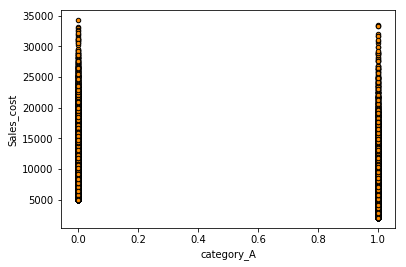

In [32]:
plt.figure()
plt.scatter(Xca, yca, s=20, edgecolor = 'black', c = "darkorange", label = "yca")
plt.xlabel('category_A') 
plt.ylabel('Sales_cost')

Text(0, 0.5, 'Sales_cost')

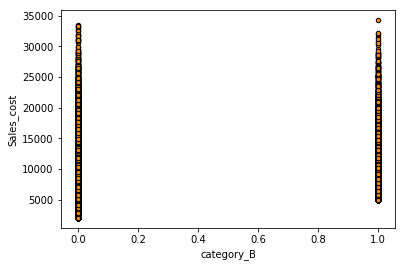

In [33]:
Xcb = df2['Category_B']
ycb = df2['sales_cost']
Xcb = Xcb.values.reshape(-1,1)
plt.figure()
plt.scatter(Xcb, ycb, s=20, edgecolor = 'black', c = "darkorange", label = "ycb")
plt.xlabel('category_B') 
plt.ylabel('Sales_cost')

Text(0, 0.5, 'Sales_cost')

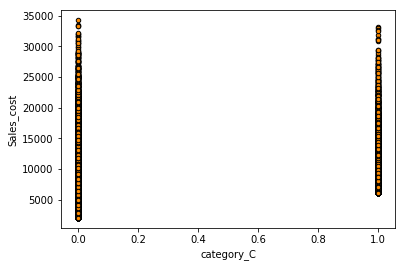

In [34]:
Xcc = df2['Category_C']
ycc = df2['sales_cost']
Xcc = Xcc.values.reshape(-1,1)
plt.figure()
plt.scatter(Xcc, ycc, s=20, edgecolor = 'black', c = "darkorange", label = "ycc")
plt.xlabel('category_C') 
plt.ylabel('Sales_cost')

And also taking all the columns except category(as we have already one hot encoded it), licensing fees as input features.

In [35]:
X = df2[['item_id', 'week', 'Category_A', 'Category_B', 'Category_C']]
X.head()

,item_id,week,Category_A,Category_B,Category_C
0,125,21,0,0,1
1,125,47,0,0,1
2,125,24,0,0,1
3,125,30,0,0,1
4,125,12,0,0,1


In [36]:
X.shape

(9600, 5)

Since sales cost is the target variable here, we are taking it as y 

In [37]:
y = df2[['sales_cost']]
y.head()

,sales_cost
0,6000.0
1,6000.0
2,6000.0
3,6000.0
4,6000.0


In [38]:
y.shape

(9600, 1)

Before applying the algorithms, the data is split into training and testing sets in the ratio 4 : 1 that is test data 20% and train data 80%.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.head()

,item_id,week,Category_A,Category_B,Category_C
5783,5,14,1,0,0
2948,147,16,0,0,1
4442,37,39,1,0,0
5281,46,34,1,0,0
4937,41,11,1,0,0


In [40]:
y_train.head()

,sales_cost
5783,7114.582617
2948,26115.029925
4442,6258.772231
5281,5159.436035
4937,11304.888616


# Applying the models on the data

Here I am considering five different models:
1. Linear Regression 
2. Random forest with max_depth =3
3. XGBoost with Learning Task Parameter as Linear regression
4. Decision trees with max_depth =2 and max_depth =5
5. AdaBoost with Desision tree regressor(max_depth =4) as the base algorithm

## 1. Linear Regression 

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [42]:
regr1 = linear_model.LinearRegression()
regr_linear_model = regr1.fit(X_train,y_train)

In [43]:
y_predicted = regr_linear_model.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
error1 = mean_absolute_error(y_test, y_predicted)
error1

3971.0844234683796

In [46]:
X_test.shape, y_test.shape

((1920, 5), (1920, 1))

## 2. Random forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regr2 = RandomForestRegressor(n_estimators = 100, max_depth= 3, random_state=0)

In [49]:
regr2.fit(X_train, y_train)

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
y_predicted2 = regr2.predict(X_test)
y_predicted2

array([11854.70576461, 11622.24104408, 10232.49756404, ...,
        7341.29673033, 13982.74201163, 13568.17138952])

In [51]:
error2 = mean_absolute_error(y_test, y_predicted2)
error2

3940.5387999678624

## 3. XG Boost

In [52]:
import xgboost as xgb

In [53]:
xgb_model_1 = xgb.XGBRegressor(objective="reg:linear", random_state=0)

In [54]:
xgb_model_1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
y_predicted3 = xgb_model_1.predict(X_test)
y_predicted3

array([ 9174.45  , 11787.542 ,  9607.71  , ...,  7620.9673, 13508.274 ,
       13775.865 ], dtype=float32)

In [56]:
error3 = mean_absolute_error(y_test, y_predicted3)
error3

3161.948231923396

## 4. Decision Trees

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
regr_4_1 = DecisionTreeRegressor(max_depth = 2)
regr_4_2 = DecisionTreeRegressor(max_depth = 5)
regr_4_1.fit(X_train,y_train)
regr_4_2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
predicted_4_1 = regr_4_1.predict(X_test)
predicted_4_2 = regr_4_2.predict(X_test)

In [60]:
error_4_1 = mean_absolute_error(y_test , predicted_4_1)
error_4_1

3977.8313945683144

In [61]:
error_4_2 = mean_absolute_error(y_test , predicted_4_2)
error_4_2

3930.872850227206

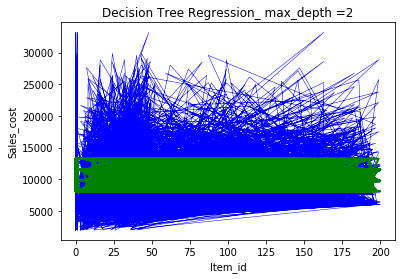

In [62]:
plt.figure()
plt.plot(X_test, y_test, color="blue", label="max_depth=2", linewidth=0.5)
plt.plot(X_test, predicted_4_1, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Decision Tree Regression_ max_depth =2")
plt.show()

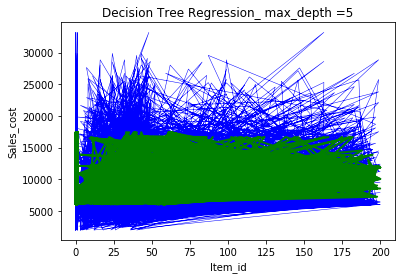

In [63]:
plt.figure()
plt.plot(X_test, y_test, color="blue", label="max_depth=2", linewidth=0.5)
plt.plot(X_test, predicted_4_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Decision Tree Regression_ max_depth =5")
plt.show()

## 5.AdaBoost

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [65]:
regr_5_1 = DecisionTreeRegressor(max_depth=4)
regr_5_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=100, random_state= 0)

In [66]:
regr_5_1.fit(X_train, y_train)
regr_5_2.fit(X_train, y_train)

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=0)

In [67]:
# Predict
predicted_5_1 = regr_5_1.predict(X_test)
predicted_5_2 = regr_5_2.predict(X_test)

In [68]:
error_5_1 = mean_absolute_error(y_test , predicted_5_1)
error_5_1

3942.3782255972715

In [69]:
error_5_2 = mean_absolute_error(y_test , predicted_5_2)
error_5_2

4370.9316005851415

# Comparision of the Models

#### Observations:
Errors for the above five models are 
- Linear regression, error1 = 3971.0844234683796
- Random forest, error2 = 3940.5387999678624
- XGBoost Regressor, error3 = 3161.948231923396
- Decision trees (max_depth =2), error_4_1 = 3977.831394568316 
- Decision trees (max_depth =5), error_4_2 = 3930.872850227206
- Decision trees (max_depth =4), error_5_1 = 3942.378225597271
- AdaBoost, error_5_1 = 4370.9316005851415

Plotting the error values:

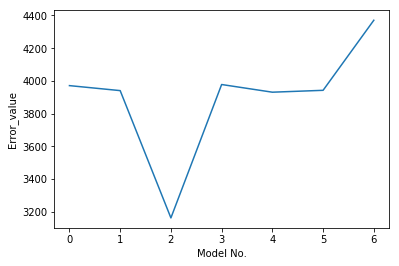

In [70]:
plt.plot([error1, error2, error3, error_4_1, error_4_2, error_5_1, error_5_2])
plt.ylabel('Error_value')
plt.xlabel('Model No.')
plt.show()

#### Conclusion:
We can observe that error3 is minimum, which corresponds to XG Boost model. 
So we consider XG Boost for predicting the test data

# Approach 2

As I have said earlier (at the start of Approach 1) we assumed that the *sales cost* of every item as the sum of its profit + licensing fees.

Now, I am assuming *sales cost* as mean of profit + licensing fees for the items with profit=0

In [71]:
len(df2)

9600

In [72]:
for i in range(len(df2)) :
    if df2['profit'].loc[i] == 0 :
        df2['sales_cost'].loc[i] = df2['licensing_fees'].loc[i] / 2

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C
0,125,21,0.0,C,6000,3000.0,0,0,1
1,125,47,0.0,C,6000,3000.0,0,0,1
2,125,24,0.0,C,6000,3000.0,0,0,1
3,125,30,0.0,C,6000,3000.0,0,0,1
4,125,12,0.0,C,6000,3000.0,0,0,1


In [74]:
df2[df2['profit'] == 0]

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C
0,125,21,0.0,C,6000,3000.0,0,0,1
1,125,47,0.0,C,6000,3000.0,0,0,1
2,125,24,0.0,C,6000,3000.0,0,0,1
3,125,30,0.0,C,6000,3000.0,0,0,1
4,125,12,0.0,C,6000,3000.0,0,0,1
6,125,15,0.0,C,6000,3000.0,0,0,1
7,125,9,0.0,C,6000,3000.0,0,0,1
8,125,20,0.0,C,6000,3000.0,0,0,1
9,125,14,0.0,C,6000,3000.0,0,0,1
11,125,17,0.0,C,6000,3000.0,0,0,1


In [75]:
df2.describe()

,item_id,week,profit,licensing_fees,sales_cost,Category_A,Category_B,Category_C
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878,4693.958333,9748.236795,0.230521,0.383958,0.385521
std,57.801488,15.019602,5586.007129,1538.438615,5960.005790,0.421188,0.486373,0.486743
min,1.000000,1.000000,0.000000,2000.000000,1000.000000,0.000000,0.000000,0.000000
25%,50.000000,14.000000,806.516798,5000.000000,5147.740878,0.000000,0.000000,0.000000
50%,101.000000,27.000000,4046.271519,5000.000000,8739.314533,0.000000,0.000000,0.000000
75%,151.000000,40.000000,8682.553457,6000.000000,13392.373287,0.000000,1.000000,1.000000
max,200.000000,52.000000,31440.363492,6000.000000,34258.428460,1.000000,1.000000,1.000000


In [76]:
df2['sales_cost'].value_counts()

3000.000000     1019
2500.000000      785
1000.000000       29
7910.213801        1
14340.730276       1
25155.451446       1
10552.225350       1
14299.503902       1
7336.795295        1
9845.079467        1
25264.170357       1
20276.184319       1
5176.301881        1
12664.750482       1
4014.335198        1
26692.657499       1
6580.763279        1
12106.462676       1
7992.526303        1
14477.210678       1
9104.163565        1
6147.960242        1
24828.757407       1
10639.117310       1
9026.506028        1
12475.045211       1
7521.299305        1
6099.991823        1
15352.049069       1
12378.642202       1
                ... 
25876.841911       1
15101.703270       1
7035.551528        1
22775.824927       1
8474.621153        1
6753.396438        1
16319.823408       1
24679.928842       1
10459.403215       1
12646.403736       1
7636.068083        1
5746.391672        1
5112.600339        1
10726.583665       1
21818.815362       1
13490.098594       1
16993.868872 

In [77]:
df2[df2['sales_cost'] == 0]

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C


## Applying the models on the data

In [78]:
X_2 = df2[['item_id', 'week', 'Category_A', 'Category_B', 'Category_C']]
X_2.head()

,item_id,week,Category_A,Category_B,Category_C
0,125,21,0,0,1
1,125,47,0,0,1
2,125,24,0,0,1
3,125,30,0,0,1
4,125,12,0,0,1


In [79]:
X_2.shape

(9600, 5)

Since sales cost is the target variable here, we are taking it as y

In [80]:
y_2 = df2[['sales_cost']]
y_2.head()

,sales_cost
0,3000.0
1,3000.0
2,3000.0
3,3000.0
4,3000.0


In [81]:
y_2.shape

(9600, 1)

In [82]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size=0.2, random_state=0)
X_train_2.head()

,item_id,week,Category_A,Category_B,Category_C
5783,5,14,1,0,0
2948,147,16,0,0,1
4442,37,39,1,0,0
5281,46,34,1,0,0
4937,41,11,1,0,0


In [83]:
y_train_2.head()

,sales_cost
5783,7114.582617
2948,26115.029925
4442,6258.772231
5281,5159.436035
4937,11304.888616


## 1. Linear Regression

In [84]:
regr1 = linear_model.LinearRegression()
regr_linear_model = regr1.fit(X_train_2,y_train)

y_predicted = regr_linear_model.predict(X_test_2)

error1 = mean_absolute_error(y_test_2, y_predicted)
error1

4477.594840135046

## 2. Random forest

In [85]:
regr2 = RandomForestRegressor(n_estimators = 100, max_depth= 3, random_state=0)

regr2.fit(X_train_2, y_train_2)

y_predicted2 = regr2.predict(X_test_2)
y_predicted2

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([11773.72610132, 10841.30548992,  9675.15004143, ...,
        5886.20697475, 13336.6391709 , 13199.01748148])

In [86]:
error2 = mean_absolute_error(y_test_2, y_predicted2)
error2

4354.882073002548

## 3. XG Boost

In [87]:
xgb_model_2 = xgb.XGBRegressor(objective="reg:linear", random_state=0)

xgb_model_2.fit(X_train_2, y_train_2)

y_predicted3 = xgb_model_2.predict(X_test_2)
y_predicted3

array([10452.32  , 11380.357 ,  9379.07  , ...,  6382.7188, 11291.4795,
       13306.704 ], dtype=float32)

In [88]:
error3 = mean_absolute_error(y_test_2, y_predicted3)
error3

3531.183537206663

## 4. Decision Trees

In [89]:
regr_4_1 = DecisionTreeRegressor(max_depth = 2)
regr_4_2 = DecisionTreeRegressor(max_depth = 5)
regr_4_1.fit(X_train_2, y_train_2)
regr_4_2.fit(X_train_2, y_train_2)

predicted_4_1 = regr_4_1.predict(X_test_2)
predicted_4_2 = regr_4_2.predict(X_test_2)

error_4_1 = mean_absolute_error(y_test_2 , predicted_4_1)
error_4_1

4395.222864256097

In [90]:
error_4_2 = mean_absolute_error(y_test_2 , predicted_4_2)
error_4_2

4345.643514071935

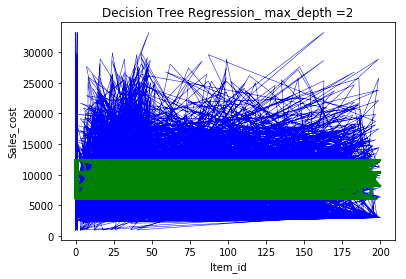

In [91]:
plt.figure()
plt.plot(X_test_2, y_test_2, color="blue", label="max_depth=2", linewidth=0.5)
plt.plot(X_test_2, predicted_4_1, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Decision Tree Regression_ max_depth =2")
plt.show()

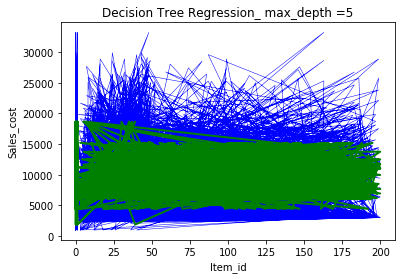

In [92]:
plt.figure()
plt.plot(X_test_2, y_test_2, color="blue", label="max_depth=2", linewidth=0.5)
plt.plot(X_test_2, predicted_4_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Decision Tree Regression_ max_depth =5")
plt.show()

## 5.AdaBoost

In [93]:
regr_5_1 = DecisionTreeRegressor(max_depth=4)
regr_5_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=100, random_state= 0)

regr_5_1.fit(X_train_2, y_train_2)
regr_5_2.fit(X_train_2, y_train_2)

# Predict
predicted_5_1 = regr_5_1.predict(X_test_2)
predicted_5_2 = regr_5_2.predict(X_test_2)

error_5_1 = mean_absolute_error(y_test_2 , predicted_5_1)
error_5_1

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4348.775408855083

In [94]:
error_5_2 = mean_absolute_error(y_test_2 , predicted_5_2)
error_5_2

4808.073434096627

## Comparision of the Models

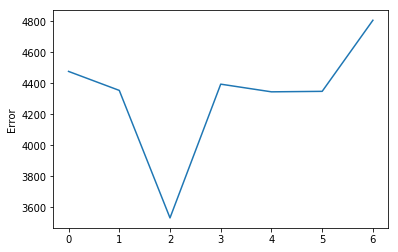

In [95]:
plt.plot([error1, error2, error3, error_4_1, error_4_2, error_5_1, error_5_2])
plt.ylabel('Error')
plt.show()

We can observe that even in the "approach 2" error3 is minimum, which corresponds to XG Boost model. 

But when compared to the Approach 1 and Approach 2, Approach 1 has a better prediction with mean squared error less than Approach 2 

# Test data set

In [96]:
file4 = 'test.csv'
sales4 = pd.read_csv(file4)
sales4.shape

(800, 2)

In [97]:
sales4.head()

,item_id,week
0,21,1
1,32,1
2,38,1
3,41,1
4,56,1


In [98]:
sales4 = pd.merge(sales4, sales3)
sales4.head()

,item_id,week,category
0,21,1,A
1,21,5,A
2,21,27,A
3,21,42,A
4,32,1,A


In [99]:
sales4 = pd.merge(sales4, sales2)
sales4.head()

,item_id,week,category,licensing_fees
0,21,1,A,2000
1,21,5,A,2000
2,21,27,A,2000
3,21,42,A,2000
4,32,1,A,2000


In [100]:
embarked_dataset2 = pd.get_dummies(sales4.category, prefix='Category')
embarked_dataset2.head()

,Category_A,Category_B,Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [101]:
sales4 = pd.concat([sales4, embarked_dataset2], axis=1, levels=1)
sales4.head()

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C
0,21,1,A,2000,1,0,0
1,21,5,A,2000,1,0,0
2,21,27,A,2000,1,0,0
3,21,42,A,2000,1,0,0
4,32,1,A,2000,1,0,0


In [102]:
sales4.describe()

,item_id,week,licensing_fees,Category_A,Category_B,Category_C
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,100.248750,26.188750,4707.50000,0.223750,0.397500,0.378750
std,56.993638,14.887669,1519.81283,0.417017,0.489687,0.485379
min,1.000000,1.000000,2000.00000,0.000000,0.000000,0.000000
25%,52.000000,13.000000,5000.00000,0.000000,0.000000,0.000000
50%,98.500000,26.000000,5000.00000,0.000000,0.000000,0.000000
75%,150.000000,39.000000,6000.00000,0.000000,1.000000,1.000000
max,200.000000,52.000000,6000.00000,1.000000,1.000000,1.000000


In [103]:
test_data = sales4[['item_id', 'week', 'Category_A', 'Category_B', 'Category_C']]

In [104]:
Final_predicted = xgb_model_1.predict(test_data)

In [105]:
Final_predicted.shape

(800,)

In [106]:
df3 = pd.DataFrame(data=Final_predicted, columns=['Expected_sales'])

In [107]:
df3.head()

,Expected_sales
0,10126.839844
1,9413.801758
2,12457.143555
3,14551.106445
4,7901.835449


In [108]:
df3.describe()

,Expected_sales
count,800.000000
mean,10244.328125
std,2352.303223
min,4902.705078
25%,8532.903320
50%,10199.579590
75%,11768.727539
max,19713.630859


In [109]:
sales4 = pd.concat([sales4, df3], axis=1, levels=1)
sales4.head()

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales
0,21,1,A,2000,1,0,0,10126.839844
1,21,5,A,2000,1,0,0,9413.801758
2,21,27,A,2000,1,0,0,12457.143555
3,21,42,A,2000,1,0,0,14551.106445
4,32,1,A,2000,1,0,0,7901.835449


In [121]:
sales4['profit'] = pd.Series(sales4.Expected_sales - sales4.licensing_fees, index=sales4.index)
sales4.head()

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
0,21,1,A,2000,1,0,0,10126.839844,8126.839844
1,21,5,A,2000,1,0,0,9413.801758,7413.801758
2,21,27,A,2000,1,0,0,12457.143555,10457.143555
3,21,42,A,2000,1,0,0,14551.106445,12551.106445
4,32,1,A,2000,1,0,0,7901.835449,5901.835449


In [122]:
sales4.tail() 

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
795,139,48,C,6000,0,0,1,14713.315430,8713.315430
796,139,50,C,6000,0,0,1,12075.374023,6075.374023
797,137,42,C,6000,0,0,1,12531.500977,6531.500977
798,185,46,C,6000,0,0,1,12467.166992,6467.166992
799,185,49,C,6000,0,0,1,14018.280273,8018.280273


In [123]:
sales4.describe()

,item_id,week,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,100.248750,26.188750,4707.50000,0.223750,0.397500,0.378750,10244.328125,5536.827988
std,56.993638,14.887669,1519.81283,0.417017,0.489687,0.485379,2352.303223,2748.512311
min,1.000000,1.000000,2000.00000,0.000000,0.000000,0.000000,4902.705078,-326.308594
25%,52.000000,13.000000,5000.00000,0.000000,0.000000,0.000000,8532.903320,3526.604492
50%,98.500000,26.000000,5000.00000,0.000000,0.000000,0.000000,10199.579590,5423.390625
75%,150.000000,39.000000,6000.00000,0.000000,1.000000,1.000000,11768.727539,6944.885010
max,200.000000,52.000000,6000.00000,1.000000,1.000000,1.000000,19713.630859,16026.539062


In [124]:
len(sales4['profit'])

800

In [125]:
sales4[sales4['profit'] < 0]

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
276,57,4,B,5000,0,1,0,4960.890625,-39.109375
575,125,4,C,6000,0,0,1,5673.691406,-326.308594
585,128,4,C,6000,0,0,1,5673.691406,-326.308594


The negative terms in the profit column must be changed to 0, meaning that the item should not be sold

In [126]:
for i in range(len(sales4)) :
    if sales4['profit'].loc[i] < 0 :
        sales4['profit'].loc[i] = 0

In [127]:
sales4.describe()

,item_id,week,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,100.248750,26.188750,4707.50000,0.223750,0.397500,0.378750,10244.328125,5537.692646
std,56.993638,14.887669,1519.81283,0.417017,0.489687,0.485379,2352.303223,2746.718738
min,1.000000,1.000000,2000.00000,0.000000,0.000000,0.000000,4902.705078,0.000000
25%,52.000000,13.000000,5000.00000,0.000000,0.000000,0.000000,8532.903320,3526.604492
50%,98.500000,26.000000,5000.00000,0.000000,0.000000,0.000000,10199.579590,5423.390625
75%,150.000000,39.000000,6000.00000,0.000000,1.000000,1.000000,11768.727539,6944.885010
max,200.000000,52.000000,6000.00000,1.000000,1.000000,1.000000,19713.630859,16026.539062


In [128]:
sales4[sales4['profit']==0]

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
276,57,4,B,5000,0,1,0,4960.890625,0.0
575,125,4,C,6000,0,0,1,5673.691406,0.0
585,128,4,C,6000,0,0,1,5673.691406,0.0


In [129]:
sales4[['item_id', 'week', 'profit']].to_csv('Predicted_data.csv', index= False)